   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

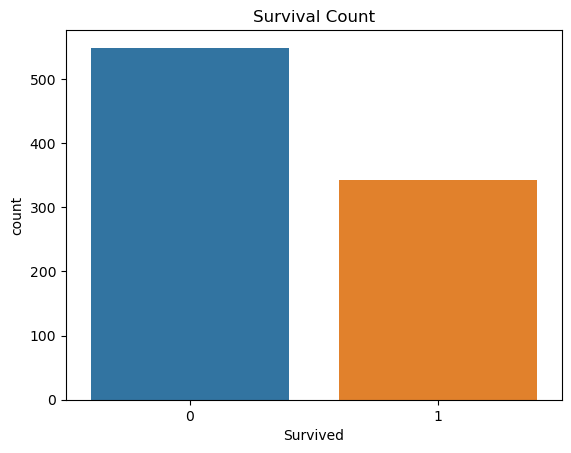

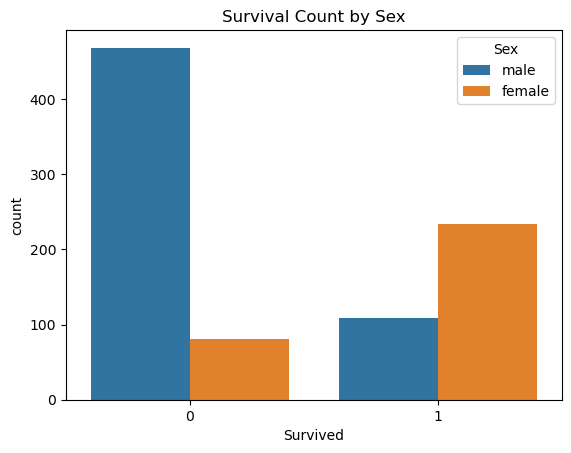

Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



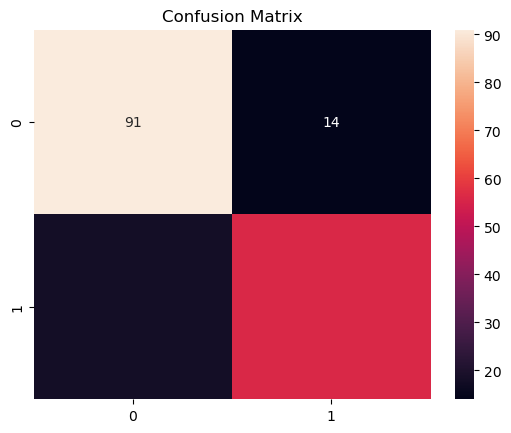

In [7]:
import pandas as pd

# Load the Dataset
url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv"
data = pd.read_csv(url)
# D Exploratory Data Analysis (EDA)
print(data.head())

# Get a summary of the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())
#Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the survival rate
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.show()

# Visualize survival rate by sex
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival Count by Sex')
plt.show()
# Fill missing values in 'Age' with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

#Data Preprocessing
# Convert categorical variables into numerical ones
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

#Feature Selection

# Select relevant features
# Corrected feature selection
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()
